In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
h = 0.25

In [3]:
fFD =  1./(2.*h*h) 
fPD =  1./(8.*h/2*h/2) 

In [4]:
M = np.zeros([23,23])

In [5]:
M [0][0] = 1

In [6]:
for i in range (1,4):
    M [i][i-1] = -2 * fFD
    M [i][i] = 4 * fFD
    M [i][i+1] = -2 * fFD

Match the displacement $u_3$ and $u_5$

In [7]:
M [5][5] = -1
M [5][3] = 1

Match the displacement $u_4$ and $u_7$

In [8]:
M [4][4] = -1
M [4][7] = 1

Interpolate the displacement $u_6$ and $u_6'$

* $u_6'-u_6=0$
* $\frac{1}{2}\left(u_3 + u_4\right)-u_5=0$

In [9]:
M [6][6] = -1
M [6][2] = -3/16
M [6][3] = 14/16
M [6][4] = 5/16

Apply the non-local model

In [10]:
for i in range(7,16):
    M[i][i-2] = -1.  * fPD
    M[i][i-1] = -4. * fPD
    M[i][i] = 10. * fPD
    M[i][i+1] =  -4. * fPD
    M[i][i+2] = -1. * fPD

Interpolate the displacement $u_{16}$ and $u_{16}'$

In [11]:
M [16][16] = -1
M [16][18] = 5/16
M [16][19] = 14/16
M [16][20] = -3/16

Match the displacement $u_{17}$ and $u_{19}$

In [12]:
M [17][17] = -1
M [17][19] = 1

Match the displacement $u_{15}$ and $u_{18}$

In [13]:
M [18][18] = -1
M [18][15] = 1

In [14]:
for i in range (19,22):
    M [i][i-1] = -2  * fFD
    M [i][i] = 4 * fFD
    M [i][i+1] = -2 * fFD

In [15]:
M [22][22] = 11/6/h
M [22][21] = -18/6/h
M [22][20] = 9/6/h
M [22][19] = -2/6/h

In [16]:
M

array([[  1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [-16.        ,  32.        , -16.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        , -16.        ,  32.        , -16.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
  

Contruct the force vector

In [17]:
f = np.zeros([23])

In [18]:
for i in range(1,22):
    f[i] =  -2

In [19]:
f [4] = 0 # the displacememnt is matching therefore the force is zero
f [5] = 0 
f [6] = 0 
f [18] = 0 
f [16] = 0
f [17] = 0
f[22] = 6

In [20]:
f

array([ 0., -2., -2., -2.,  0.,  0.,  0., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2.,  0.,  0.,  0., -2., -2., -2.,  6.])

In [21]:
u = np.linalg.solve(M,f)
u

array([2.22044605e-16, 4.04029141e-02, 2.05805828e-01, 4.96208742e-01,
       9.11611656e-01, 4.96208742e-01, 6.80472699e-01, 9.11611656e-01,
       1.17131979e+00, 1.46273788e+00, 1.78532700e+00, 2.13918005e+00,
       2.52427845e+00, 2.94064080e+00, 3.38817416e+00, 3.86741748e+00,
       4.37522998e+00, 4.92991748e+00, 3.86741748e+00, 4.92991748e+00,
       6.11741748e+00, 7.42991748e+00, 8.86741748e+00])

In [22]:
x1 = np.arange(0,1,0.25)
x2 = np.arange(1,2,0.125)
x3 = np.arange(2,3.25,0.25)
x20 = np.array(np.concatenate((x1,x2,x3)))
x20

array([0.   , 0.25 , 0.5  , 0.75 , 1.   , 1.125, 1.25 , 1.375, 1.5  ,
       1.625, 1.75 , 1.875, 2.   , 2.25 , 2.5  , 2.75 , 3.   ])

In [23]:
uSlice = np.array(np.concatenate((u[0:5],u[8:15],u[18:len(u)])))
uSlice

array([2.22044605e-16, 4.04029141e-02, 2.05805828e-01, 4.96208742e-01,
       9.11611656e-01, 1.17131979e+00, 1.46273788e+00, 1.78532700e+00,
       2.13918005e+00, 2.52427845e+00, 2.94064080e+00, 3.38817416e+00,
       3.86741748e+00, 4.92991748e+00, 6.11741748e+00, 7.42991748e+00,
       8.86741748e+00])

In [24]:
len(u)

23

In [25]:
len(uSlice)

17

In [26]:
len(x20)

17

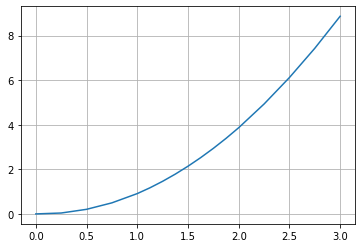

In [27]:
plt.plot(x20,uSlice)
plt.grid()

In [28]:
h2= 0.125

In [29]:
fFD2 =  1./(2.*h2*h2) 
fPD2 =  1./(8.*h2/2*h2/2) 

In [30]:
M2 = np.zeros([39,39])

In [31]:
M2 [0][0] = 1

In [32]:
for i in range (1, 8):
    M2[i][i-1]=-2 * fFD2
    M2[i][i]= 4 * fFD2
    M2[i][i+1]= -2 * fFD2

Match the dispacement between $u_7$ and $u_9$

In [33]:
M2[9][9]= -1
M2[9][7]=1

Match the dispacement between $u_8$ and $u_{11}$

In [34]:
M2[8][8]= -1
M2[8][11]=1

Interpolate the displacement $u_{10}$ and $u_{9}'$

* $u_{10}'-u_{10}=0$
* $\frac{1}{2}\left(u_7 + u_8\right)-u_{10}=0$

In [35]:
M2 [10][10] = -1
M2 [10][6] = -3/16
M2 [10][7] = 14/16
M2 [10][8] = 5/16

Apply the non-local model

In [36]:
for i in range(11,28):
    M2[i][i-2] = -1.  * fPD2
    M2[i][i-1] = -4. * fPD2
    M2[i][i] = 10. * fPD2
    M2[i][i+1] =  -4. * fPD2
    M2[i][i+2] = -1. * fPD2

Interpolate the displacement $u_{28}$ and $u_{28}'$

* $u_{28}'-u_{28}=0$
* $\frac{1}{2}\left(u_{30} + u_{31}\right)-u_{28}=0$

In [37]:
M2 [28][28] = -1
M2 [28][30] = 5/16
M2 [28][31] = 14/16
M2 [28][32] = -3/16

Match the displacement $u_{29}$ and $u_{31}$

In [38]:
M2 [29][29] = -1
M2 [29][31] = 1

Match the displacement $u_{27}$ and $u_{30}$

In [39]:
M2 [30][30] = -1
M2 [30][27] = 1

In [40]:
for i in range (31, 38):
    M2[i][i-1]=-2 * fFD2
    M2[i][i]= 4 * fFD2
    M2[i][i+1]= -2 * fFD2

In [41]:
M2 [38][38] = 11/6/h2
M2 [38][37] = -18/6/h2
M2 [38][36] = 9/6/h2
M2 [38][35] = -2/6/h2
M2

array([[  1.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [-64.        , 128.        , -64.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , -64.        , 128.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 128.        ,
        -64.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., -64.        ,
        128.        , -64.        ],
       [  0.        ,   0.        ,   0.        , ...,  12.        ,
        -24.        ,  14.66666667]])

In [42]:
f2 = np.zeros([39])

In [43]:
for i in range(1,38):
    f2[i] =  -2

In [44]:
f2 [8] = 0 # the displacememnt is matching therefore the force is zero
f2 [9] = 0 
f2 [10] = 0 
f2 [30] = 0 
f2 [28] = 0
f2 [29] = 0
f2 [38] =6
f2

array([ 0., -2., -2., -2., -2., -2., -2., -2.,  0.,  0.,  0., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2.,  0.,  0.,  0., -2., -2., -2., -2., -2., -2., -2.,  6.])

In [45]:
u2 = np.linalg.solve(M2,f2)
u2

array([-0.        ,  0.01010073,  0.05145146,  0.12405218,  0.22790291,
        0.36300364,  0.52935437,  0.7269551 ,  0.95580583,  0.7269551 ,
        0.83552109,  0.95580583,  1.08323286,  1.21858738,  1.36173467,
        1.51269785,  1.67147295,  1.83806064,  2.01246082,  2.19467351,
        2.38469869,  2.58253637,  2.78818654,  3.00164931,  3.22292399,
        3.45201457,  3.68889791,  3.93370874,  4.18566186,  4.44933374,
        3.93370874,  4.44933374,  4.99620874,  5.57433374,  6.18370874,
        6.82433374,  7.49620874,  8.19933374,  8.93370874])

In [46]:
x4 = np.arange(0,1,0.125)
x5 = np.arange(1,2,0.0625)
x6 = np.arange(2,3.125,0.125)
x7 = np.array(np.concatenate((x4,x5,x6)))
x7

array([0.    , 0.125 , 0.25  , 0.375 , 0.5   , 0.625 , 0.75  , 0.875 ,
       1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
       1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375,
       2.    , 2.125 , 2.25  , 2.375 , 2.5   , 2.625 , 2.75  , 2.875 ,
       3.    ])

In [47]:
uSlice2 = np.array(np.concatenate((u2[0:9],u2[12:27],u2[30:len(u2)])))
uSlice2

array([-0.        ,  0.01010073,  0.05145146,  0.12405218,  0.22790291,
        0.36300364,  0.52935437,  0.7269551 ,  0.95580583,  1.08323286,
        1.21858738,  1.36173467,  1.51269785,  1.67147295,  1.83806064,
        2.01246082,  2.19467351,  2.38469869,  2.58253637,  2.78818654,
        3.00164931,  3.22292399,  3.45201457,  3.68889791,  3.93370874,
        4.44933374,  4.99620874,  5.57433374,  6.18370874,  6.82433374,
        7.49620874,  8.19933374,  8.93370874])

In [48]:
len(u2)

39

In [49]:
len(x7)

33

In [50]:
len(uSlice2)

33

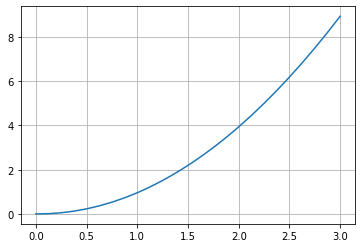

In [51]:
plt.plot(x7,uSlice2)
plt.grid()

In [52]:
h3=0.0625

In [53]:
fFD3 =  1./(2.*h3*h3) 
fPD3 =  1./(8.*h3/2*h3/2) 

In [54]:
M3 = np.zeros([71,71])

In [55]:
M3 [0][0] = 1

In [56]:
for i in range (1, 16):
    M3[i][i-1]=-2 * fFD3
    M3[i][i]= 4 * fFD3
    M3[i][i+1]= -2 * fFD3

Match the dispacement between $u_{15}$ and $u_{17}$

In [57]:
M3[17][17]= -1
M3[17][15]=1

Match the dispacement between $u_{16}$ and $u_{19}$

In [58]:
M3[16][16]= -1
M3[16][19]=1

Interpolate the displacement $u_{18}$ and $u_{18}'$

* $u_{18}'-u_{18}=0$
* $\frac{1}{2}\left(u_{15} + u_{16}\right)-u_{18}=0$

In [59]:
M3 [18][18] = -1
M3 [18][14]= -3/16
M3 [18][15] = 14/16
M3 [18][16] = 5/16

Apply the non-local model

In [60]:
for i in range(19,52):
    M3[i][i-2] = -1.  * fPD3
    M3[i][i-1] = -4. * fPD3
    M3[i][i] = 10. * fPD3
    M3[i][i+1] =  -4. * fPD3
    M3[i][i+2] = -1. * fPD3

Interpolate the displacement $u_{52}$ and $u_{52}'$

* $u_{52}'-u_{52}=0$
* $\frac{1}{2}\left(u_{54} + u_{55}\right)-u_{52}=0$

In [61]:
M3 [52][52] = -1
M3 [52][54] = 5/16
M3 [52][55] = 14/16
M3 [52][56] = -3/16

Match the displacement $u_{51}$ and $u_{54}$

In [62]:
M3 [54][54] = -1
M3 [54][51] = 1

Match the displacement $u_{53}$ and $u_{55}$

In [63]:
M3 [53][53] = -1
M3 [53][55] = 1

In [64]:
for i in range (55, 70):
    M3[i][i-1]=-2 * fFD3
    M3[i][i]= 4 * fFD3
    M3[i][i+1]= -2 * fFD3

In [65]:
M3 [70][70] = 11/6/h3
M3 [70][69] = -18/6/h3
M3 [70][68] = 9/6/h3
M3 [70][67] = -2/6/h3
M3

array([[   1.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [-256.        ,  512.        , -256.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        , -256.        ,  512.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  512.        ,
        -256.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ..., -256.        ,
         512.        , -256.        ],
       [   0.        ,    0.        ,    0.        , ...,   24.        ,
         -48.        ,   29.33333333]])

In [66]:
f3 = np.zeros([71])

In [67]:
for i in range(1,70):
    f3[i] =  -2

In [68]:
f3 [16] = 0 # the displacememnt is matching therefore the force is zero
f3 [17] = 0 
f3 [18] = 0 
f3 [52] = 0 
f3 [53] = 0
f3 [54] = 0
f3 [70] = 6
f3

array([ 0., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2.,  0.,  0.,  0., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
        0.,  0.,  0., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2.,  6.])

In [69]:
u3 = np.linalg.solve(M3,f3)
u3

array([8.88178420e-16, 2.52518207e-03, 1.28628641e-02, 3.10130462e-02,
       5.69757283e-02, 9.07509103e-02, 1.32338592e-01, 1.81738774e-01,
       2.38951457e-01, 3.03976639e-01, 3.76814321e-01, 4.57464503e-01,
       5.45927185e-01, 6.42202367e-01, 7.46290049e-01, 8.58190231e-01,
       9.77902913e-01, 8.58190231e-01, 9.16581728e-01, 9.77902913e-01,
       1.04100967e+00, 1.10609830e+00, 1.17313512e+00, 1.24212592e+00,
       1.31306969e+00, 1.38596662e+00, 1.46081666e+00, 1.53761983e+00,
       1.61637613e+00, 1.69708555e+00, 1.77974809e+00, 1.86436377e+00,
       1.95093256e+00, 2.03945448e+00, 2.12992953e+00, 2.22235770e+00,
       2.31673899e+00, 2.41307341e+00, 2.51136096e+00, 2.61160163e+00,
       2.71379542e+00, 2.81794235e+00, 2.92404239e+00, 3.03209556e+00,
       3.14210186e+00, 3.25406128e+00, 3.36797382e+00, 3.48383951e+00,
       3.60165818e+00, 3.72143083e+00, 3.84315166e+00, 3.96685437e+00,
       4.09234265e+00, 4.22076062e+00, 3.96685437e+00, 4.22076062e+00,
      

In [70]:
x8 = np.arange(0,1,0.0625)
x9 = np.arange(1,2,0.03125)
x10 = np.arange(2,3.0625,0.0625)
x11 = np.array(np.concatenate((x8,x9,x10)))
x11

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 1.03125, 1.0625 , 1.09375, 1.125  ,
       1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 , 1.34375,
       1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 ,
       1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   , 1.78125,
       1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875, 2.     ,
       2.0625 , 2.125  , 2.1875 , 2.25   , 2.3125 , 2.375  , 2.4375 ,
       2.5    , 2.5625 , 2.625  , 2.6875 , 2.75   , 2.8125 , 2.875  ,
       2.9375 , 3.     ])

In [71]:
uSlice3 = np.array(np.concatenate((u3[0:17],u3[20:52],u3[55:len(u3)])))
uSlice3

array([8.88178420e-16, 2.52518207e-03, 1.28628641e-02, 3.10130462e-02,
       5.69757283e-02, 9.07509103e-02, 1.32338592e-01, 1.81738774e-01,
       2.38951457e-01, 3.03976639e-01, 3.76814321e-01, 4.57464503e-01,
       5.45927185e-01, 6.42202367e-01, 7.46290049e-01, 8.58190231e-01,
       9.77902913e-01, 1.04100967e+00, 1.10609830e+00, 1.17313512e+00,
       1.24212592e+00, 1.31306969e+00, 1.38596662e+00, 1.46081666e+00,
       1.53761983e+00, 1.61637613e+00, 1.69708555e+00, 1.77974809e+00,
       1.86436377e+00, 1.95093256e+00, 2.03945448e+00, 2.12992953e+00,
       2.22235770e+00, 2.31673899e+00, 2.41307341e+00, 2.51136096e+00,
       2.61160163e+00, 2.71379542e+00, 2.81794235e+00, 2.92404239e+00,
       3.03209556e+00, 3.14210186e+00, 3.25406128e+00, 3.36797382e+00,
       3.48383951e+00, 3.60165818e+00, 3.72143083e+00, 3.84315166e+00,
       3.96685437e+00, 4.22076062e+00, 4.48247937e+00, 4.75201062e+00,
       5.02935437e+00, 5.31451062e+00, 5.60747937e+00, 5.90826062e+00,
      

In [72]:
len(uSlice3)

65

In [73]:
len(x11)

65

In [74]:
len(u3)

71

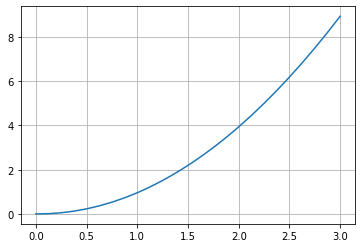

In [75]:
plt.plot(x7,uSlice2)
plt.grid()

In [76]:
def FDM (n,h):
    
    M4=np.zeros([n,n])

    M4[0][0] = 1

    for i in range(1,n-1):
        M4[i][i-1] = -2 
        M4[i][i] = 4 
        M4[i][i+1] = -2

    M4[n-1][n-1] = 11*h/3
    M4[n-1][n-2] = -18*h/3
    M4[n-1][n-3] = 9*h/3
    M4[n-1][n-4] = -2*h/3
    

    M4 *= 1./(2.*h*h)

    return M4

In [77]:
MFDM=FDM (49,0.0625)
len(MFDM)

49

In [78]:
fFDM=np.zeros([49])
len(fFDM)

49

In [79]:
for i in range(1,48):
    fFDM[i] = -2
fFDM [48] = 6
fFDM

array([ 0., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2.,  6.])

In [80]:
uFDM = np.linalg.solve(MFDM,fFDM)
uFDM

array([-0.00000000e+00,  3.90625000e-03,  1.56250000e-02,  3.51562500e-02,
        6.25000000e-02,  9.76562500e-02,  1.40625000e-01,  1.91406250e-01,
        2.50000000e-01,  3.16406250e-01,  3.90625000e-01,  4.72656250e-01,
        5.62500000e-01,  6.60156250e-01,  7.65625000e-01,  8.78906250e-01,
        1.00000000e+00,  1.12890625e+00,  1.26562500e+00,  1.41015625e+00,
        1.56250000e+00,  1.72265625e+00,  1.89062500e+00,  2.06640625e+00,
        2.25000000e+00,  2.44140625e+00,  2.64062500e+00,  2.84765625e+00,
        3.06250000e+00,  3.28515625e+00,  3.51562500e+00,  3.75390625e+00,
        4.00000000e+00,  4.25390625e+00,  4.51562500e+00,  4.78515625e+00,
        5.06250000e+00,  5.34765625e+00,  5.64062500e+00,  5.94140625e+00,
        6.25000000e+00,  6.56640625e+00,  6.89062500e+00,  7.22265625e+00,
        7.56250000e+00,  7.91015625e+00,  8.26562500e+00,  8.62890625e+00,
        9.00000000e+00])

In [81]:
xFDM = np.arange(0,3.0625,0.0625)
xFDM
len (xFDM)

49

In [82]:
MFDM= FDM(4,1)
len(fFDM)

49

In [83]:
for i in range(1,3):
    fFDM[i] = -2
fFDM

array([ 0., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2.,  6.])

Text(0.5, 1.0, 'Quadratic solution ')

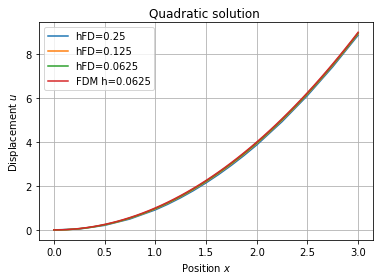

In [84]:
plt.grid()
plt.plot(x20,uSlice,label="hFD=0.25")
plt.plot(x7,uSlice2,label="hFD=0.125")
plt.plot(x11,uSlice3,label="hFD=0.0625")
plt.plot(xFDM,uFDM,label= "FDM h=0.0625")
plt.legend()
plt.xlabel(r"Position $x$")
plt.ylabel(r"Displacement $u$")
plt.title(r"Quadratic solution ")

In [85]:
MFDM=FDM (49*2-1,0.0625/2)
len(MFDM)

97

In [86]:
fFDM=np.zeros([49*2-1])
len(fFDM)

97

In [87]:
len(uSlice3)

65

In [88]:
x = np.arange(0,3+0.0625/2,0.0625/2)
x

array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
       0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
       0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
       0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
       0.875  , 0.90625, 0.9375 , 0.96875, 1.     , 1.03125, 1.0625 ,
       1.09375, 1.125  , 1.15625, 1.1875 , 1.21875, 1.25   , 1.28125,
       1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 , 1.46875, 1.5    ,
       1.53125, 1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 , 1.71875,
       1.75   , 1.78125, 1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 ,
       1.96875, 2.     , 2.03125, 2.0625 , 2.09375, 2.125  , 2.15625,
       2.1875 , 2.21875, 2.25   , 2.28125, 2.3125 , 2.34375, 2.375  ,
       2.40625, 2.4375 , 2.46875, 2.5    , 2.53125, 2.5625 , 2.59375,
       2.625  , 2.65625, 2.6875 , 2.71875, 2.75   , 2.78125, 2.8125 ,
       2.84375, 2.875  , 2.90625, 2.9375 , 2.96875, 3.     ])

In [89]:
x[0:32:2]

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
       0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375])

In [90]:
x[len(x)-33:len(x):2]

array([2.    , 2.0625, 2.125 , 2.1875, 2.25  , 2.3125, 2.375 , 2.4375,
       2.5   , 2.5625, 2.625 , 2.6875, 2.75  , 2.8125, 2.875 , 2.9375,
       3.    ])

In [91]:
for i in range(1,49*2-2):
    fFDM[i] = -2
fFDM [49*2-2] = 6
fFDM

array([ 0., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2.,  6.])

In [92]:
uFDM4 = np.linalg.solve(MFDM,fFDM)
uFDM4

array([-0.00000000e+00,  9.76562500e-04,  3.90625000e-03,  8.78906250e-03,
        1.56250000e-02,  2.44140625e-02,  3.51562500e-02,  4.78515625e-02,
        6.25000000e-02,  7.91015625e-02,  9.76562500e-02,  1.18164062e-01,
        1.40625000e-01,  1.65039062e-01,  1.91406250e-01,  2.19726562e-01,
        2.50000000e-01,  2.82226562e-01,  3.16406250e-01,  3.52539062e-01,
        3.90625000e-01,  4.30664062e-01,  4.72656250e-01,  5.16601562e-01,
        5.62500000e-01,  6.10351562e-01,  6.60156250e-01,  7.11914062e-01,
        7.65625000e-01,  8.21289062e-01,  8.78906250e-01,  9.38476562e-01,
        1.00000000e+00,  1.06347656e+00,  1.12890625e+00,  1.19628906e+00,
        1.26562500e+00,  1.33691406e+00,  1.41015625e+00,  1.48535156e+00,
        1.56250000e+00,  1.64160156e+00,  1.72265625e+00,  1.80566406e+00,
        1.89062500e+00,  1.97753906e+00,  2.06640625e+00,  2.15722656e+00,
        2.25000000e+00,  2.34472656e+00,  2.44140625e+00,  2.54003906e+00,
        2.64062500e+00,  

In [93]:
x[33:len(uFDM4)-34:1]

array([1.03125, 1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 , 1.21875,
       1.25   , 1.28125, 1.3125 , 1.34375, 1.375  , 1.40625, 1.4375 ,
       1.46875, 1.5    , 1.53125, 1.5625 , 1.59375, 1.625  , 1.65625,
       1.6875 , 1.71875, 1.75   , 1.78125, 1.8125 , 1.84375, 1.875  ,
       1.90625, 1.9375 ])

In [94]:
xSlice = np.array(np.concatenate((x[0:31:2],x[32:len(uFDM4)-31:1],x[len(uFDM4)-32:len(uFDM4):2])))

In [95]:
len(xSlice)

66

In [96]:
xSlice

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.5625 , 0.625  , 0.6875 , 0.75   , 0.8125 ,
       0.875  , 0.9375 , 1.     , 1.03125, 1.0625 , 1.09375, 1.125  ,
       1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 , 1.34375,
       1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 ,
       1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   , 1.78125,
       1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875, 2.     ,
       2.03125, 2.03125, 2.09375, 2.15625, 2.21875, 2.28125, 2.34375,
       2.40625, 2.46875, 2.53125, 2.59375, 2.65625, 2.71875, 2.78125,
       2.84375, 2.90625, 2.96875])

In [97]:
len(x11)

65

In [98]:
for i in range(1,49*2-2):
    fFDM[i] = -2
fFDM

array([ 0., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2.,  6.])

In [99]:
uFDM4Slice = np.array(np.concatenate((uFDM4[0:33:2],uFDM4[33:len(uFDM4)-33:1],uFDM4[len(uFDM4)-33:len(uFDM4):2])))


In [100]:
MFDM2=FDM(25*2-1,0.125/2)
len(MFDM2)

49

In [101]:
fFDM2=np.zeros([25*2-1])
len(fFDM2)

49

In [102]:
for i in range(1,25*2-2):
    fFDM2[i] = -2
fFDM2 [25*2-2] =6
fFDM2

array([ 0., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2.,  6.])

In [103]:
uFDM5 = np.linalg.solve(MFDM2,fFDM2)
uFDM5

array([-0.00000000e+00,  3.90625000e-03,  1.56250000e-02,  3.51562500e-02,
        6.25000000e-02,  9.76562500e-02,  1.40625000e-01,  1.91406250e-01,
        2.50000000e-01,  3.16406250e-01,  3.90625000e-01,  4.72656250e-01,
        5.62500000e-01,  6.60156250e-01,  7.65625000e-01,  8.78906250e-01,
        1.00000000e+00,  1.12890625e+00,  1.26562500e+00,  1.41015625e+00,
        1.56250000e+00,  1.72265625e+00,  1.89062500e+00,  2.06640625e+00,
        2.25000000e+00,  2.44140625e+00,  2.64062500e+00,  2.84765625e+00,
        3.06250000e+00,  3.28515625e+00,  3.51562500e+00,  3.75390625e+00,
        4.00000000e+00,  4.25390625e+00,  4.51562500e+00,  4.78515625e+00,
        5.06250000e+00,  5.34765625e+00,  5.64062500e+00,  5.94140625e+00,
        6.25000000e+00,  6.56640625e+00,  6.89062500e+00,  7.22265625e+00,
        7.56250000e+00,  7.91015625e+00,  8.26562500e+00,  8.62890625e+00,
        9.00000000e+00])

In [104]:
xSlice2 = np.array(np.concatenate((x[0:17:2],x[17:len(x)-17:1],x[len(x)-17:len(x):2])))
xSlice2

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.4375 , 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  , 0.65625,
       0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375, 0.875  ,
       0.90625, 0.9375 , 0.96875, 1.     , 1.03125, 1.0625 , 1.09375,
       1.125  , 1.15625, 1.1875 , 1.21875, 1.25   , 1.28125, 1.3125 ,
       1.34375, 1.375  , 1.40625, 1.4375 , 1.46875, 1.5    , 1.53125,
       1.5625 , 1.59375, 1.625  , 1.65625, 1.6875 , 1.71875, 1.75   ,
       1.78125, 1.8125 , 1.84375, 1.875  , 1.90625, 1.9375 , 1.96875,
       2.     , 2.03125, 2.0625 , 2.09375, 2.125  , 2.15625, 2.1875 ,
       2.21875, 2.25   , 2.28125, 2.3125 , 2.34375, 2.375  , 2.40625,
       2.4375 , 2.46875, 2.5    , 2.5625 , 2.625  , 2.6875 , 2.75   ,
       2.8125 , 2.875  , 2.9375 , 3.     ])

In [105]:
uFDM5Slice = np.array(np.concatenate((uFDM5[0:17:2],uFDM5[17:len(uFDM5)-17:1],uFDM5[len(uFDM5)-17:len(uFDM5):2])))  
len(uFDM5Slice)


33

In [106]:
uSlice2-uFDM5Slice

array([ 0.        , -0.00552427, -0.01104854, -0.01657282, -0.02209709,
       -0.02762136, -0.03314563, -0.0386699 , -0.04419417, -0.04567339,
       -0.04703762, -0.04842158, -0.04980215, -0.0511833 , -0.05256436,
       -0.05394543, -0.05532649, -0.05670756, -0.05808863, -0.05946971,
       -0.06085069, -0.06223226, -0.06361043, -0.06500834, -0.06629126,
       -0.06629126, -0.06629126, -0.06629126, -0.06629126, -0.06629126,
       -0.06629126, -0.06629126, -0.06629126])

In [107]:
MFDM3=FDM(13*2-1,0.25/2)
len(MFDM3)

25

In [108]:
fFDM3=np.zeros([13*2-1])
len(fFDM3)

25

In [109]:
for i in range(1,13*2-2):
    fFDM3[i] = -2
fFDM3 [13*2-2]=6
fFDM3

array([ 0., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,
       -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.,  6.])

In [110]:
uFDM6 = np.linalg.solve(MFDM3,fFDM3)
uFDM6

array([-0.      ,  0.015625,  0.0625  ,  0.140625,  0.25    ,  0.390625,
        0.5625  ,  0.765625,  1.      ,  1.265625,  1.5625  ,  1.890625,
        2.25    ,  2.640625,  3.0625  ,  3.515625,  4.      ,  4.515625,
        5.0625  ,  5.640625,  6.25    ,  6.890625,  7.5625  ,  8.265625,
        9.      ])

In [111]:
xSlice3 = np.array(np.concatenate((x[0:10:2],x[9:len(x)-9:1],x[len(x)-9:len(x):2])))
xSlice3

array([0.     , 0.0625 , 0.125  , 0.1875 , 0.25   , 0.28125, 0.3125 ,
       0.34375, 0.375  , 0.40625, 0.4375 , 0.46875, 0.5    , 0.53125,
       0.5625 , 0.59375, 0.625  , 0.65625, 0.6875 , 0.71875, 0.75   ,
       0.78125, 0.8125 , 0.84375, 0.875  , 0.90625, 0.9375 , 0.96875,
       1.     , 1.03125, 1.0625 , 1.09375, 1.125  , 1.15625, 1.1875 ,
       1.21875, 1.25   , 1.28125, 1.3125 , 1.34375, 1.375  , 1.40625,
       1.4375 , 1.46875, 1.5    , 1.53125, 1.5625 , 1.59375, 1.625  ,
       1.65625, 1.6875 , 1.71875, 1.75   , 1.78125, 1.8125 , 1.84375,
       1.875  , 1.90625, 1.9375 , 1.96875, 2.     , 2.03125, 2.0625 ,
       2.09375, 2.125  , 2.15625, 2.1875 , 2.21875, 2.25   , 2.28125,
       2.3125 , 2.34375, 2.375  , 2.40625, 2.4375 , 2.46875, 2.5    ,
       2.53125, 2.5625 , 2.59375, 2.625  , 2.65625, 2.6875 , 2.71875,
       2.75   , 2.8125 , 2.875  , 2.9375 , 3.     ])

In [112]:
uFDM6Slice = np.array(np.concatenate((uFDM6[0:10:2],uFDM6[9:len(uFDM6)-9:1],uFDM6[len(uFDM6)-9:len(uFDM6):2])))  
len(uFDM6Slice)

17

In [113]:
uSlice-uFDM6Slice

array([ 2.22044605e-16, -2.20970859e-02, -4.41941719e-02, -6.62912578e-02,
       -8.83883437e-02, -9.43052148e-02, -9.97621172e-02, -1.05298004e-01,
       -1.10819952e-01, -1.16346547e-01, -1.21859203e-01, -1.27450844e-01,
       -1.32582516e-01, -1.32582516e-01, -1.32582516e-01, -1.32582516e-01,
       -1.32582516e-01])

Text(0.5, 0, 'position')

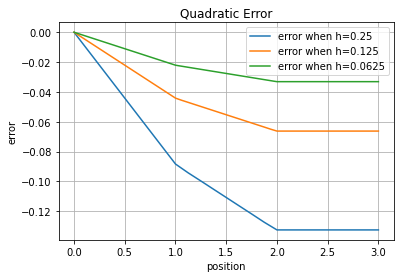

In [114]:
plt.plot(x20,uSlice-uFDM6Slice,label="error when h=0.25")
plt.plot(x7,uSlice2-uFDM5Slice,label="error when h=0.125")
plt.plot(x11,uSlice3-uFDM4Slice,label="error when h=0.0625")
plt.legend()
plt.grid()
plt.title("Quadratic Error")
plt.ylabel("error")
plt.xlabel("position")